In [41]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

dataset = pd.read_csv('news.csv')
dataset['text'] = dataset['headline'] + " " + dataset['short_description']
dataset = dataset.drop(columns=['headline', 'short_description'], axis=1)

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

dataset['cleaned_text'] = dataset['text'].apply(clean_text)
label_encoder = LabelEncoder()
dataset['category_encoded'] = label_encoder.fit_transform(dataset['category'])
dataset.to_csv("preprocessed_news_articles.csv", index=False)
print("\nPreprocessed Dataset:")
print(dataset[['cleaned_text', 'category', 'category_encoded']].head())
print("\nEncoded Categories:")
print(label_encoder.classes_)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Preprocessed Dataset:
                                        cleaned_text  category  \
0  miles days lessons learned resting part traini...  WELLNESS   
1  talking crazy crazy helpful think talking tool...  WELLNESS   
2  crenezumab trial gauge whether alzheimers drug...  WELLNESS   
3  oh difference made want busy keep trying perfe...  WELLNESS   
4  green superfoods first bad news soda bread cor...  WELLNESS   

   category_encoded  
0                 8  
1                 8  
2                 8  
3                 8  
4                 8  

Encoded Categories:
['BUSINESS' 'ENTERTAINMENT' 'FOOD & DRINK' 'PARENTING' 'POLITICS' 'SPORTS'
 'STYLE & BEAUTY' 'TRAVEL' 'WELLNESS' 'WORLD NEWS']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6820\392974092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['category'], order=dataset['category'].value_counts().index, palette="viridis")


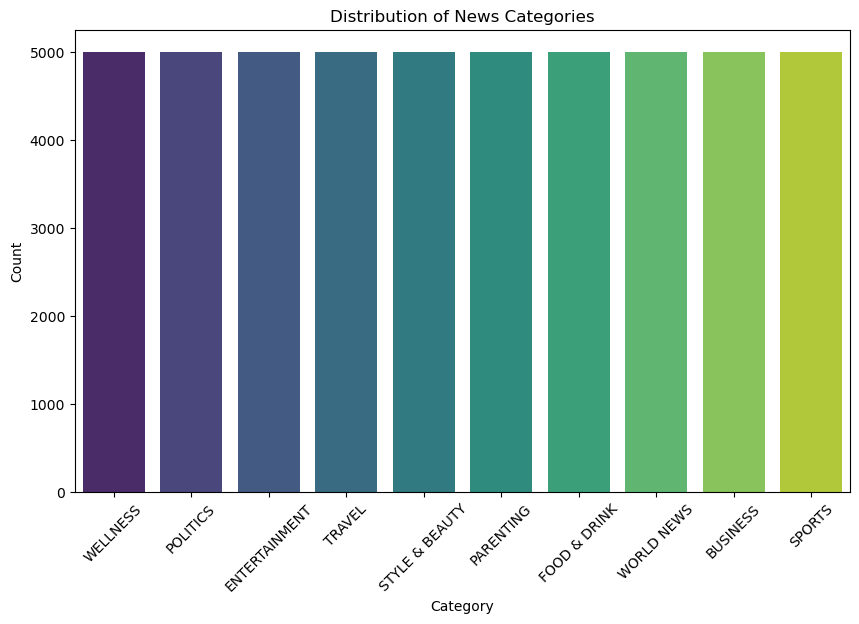

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['category'], order=dataset['category'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()




In [45]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
text_data = dataset['cleaned_text'] 

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(text_data)
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(text_data)
print(f"Bag-of-Words Matrix Shape: {X_bow.shape}")


TF-IDF Matrix Shape: (50000, 5000)
Bag-of-Words Matrix Shape: (50000, 5000)


In [47]:
X = dataset['cleaned_text']  
y = dataset['category']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%')
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Accuracy (Naive Bayes): 81.35%
Classification Report (Naive Bayes):
                precision    recall  f1-score   support

      BUSINESS       0.74      0.78      0.76       955
 ENTERTAINMENT       0.87      0.76      0.81       985
  FOOD & DRINK       0.87      0.84      0.86      1021
     PARENTING       0.70      0.79      0.74      1030
      POLITICS       0.83      0.76      0.79      1034
        SPORTS       0.91      0.92      0.91       995
STYLE & BEAUTY       0.87      0.87      0.87       986
        TRAVEL       0.82      0.82      0.82      1008
      WELLNESS       0.73      0.76      0.75      1009
    WORLD NEWS       0.83      0.83      0.83       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy (Logistic Regression): {accuracy_lr * 100:.2f}%')
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Accuracy (Logistic Regression): 81.45%
Classification Report (Logistic Regression):
                precision    recall  f1-score   support

      BUSINESS       0.76      0.81      0.78       955
 ENTERTAINMENT       0.81      0.81      0.81       985
  FOOD & DRINK       0.86      0.84      0.85      1021
     PARENTING       0.79      0.76      0.77      1030
      POLITICS       0.81      0.75      0.78      1034
        SPORTS       0.90      0.92      0.91       995
STYLE & BEAUTY       0.87      0.86      0.86       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.73      0.77      0.75      1009
    WORLD NEWS       0.80      0.82      0.81       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000



In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
log_reg = LogisticRegression(max_iter=1000, random_state=42)

cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5, scoring='accuracy')
log_reg.fit(X_train_tfidf, y_train)
y_pred = log_reg.predict(X_test_tfidf)


print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Accuracy: 80.70%
Test Set Accuracy: 81.45%
Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.81      0.78       955
 ENTERTAINMENT       0.81      0.81      0.81       985
  FOOD & DRINK       0.86      0.84      0.85      1021
     PARENTING       0.79      0.76      0.77      1030
      POLITICS       0.81      0.75      0.78      1034
        SPORTS       0.90      0.92      0.91       995
STYLE & BEAUTY       0.87      0.86      0.86       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.73      0.77      0.75      1009
    WORLD NEWS       0.80      0.82      0.81       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000



In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)
y_pred_lr = logistic_model.predict(X_test_tfidf)

print("Logistic Regression Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Model Evaluation
Accuracy: 81.45%

Classification Report:

                precision    recall  f1-score   support

      BUSINESS       0.76      0.81      0.78       955
 ENTERTAINMENT       0.81      0.81      0.81       985
  FOOD & DRINK       0.86      0.84      0.85      1021
     PARENTING       0.79      0.76      0.77      1030
      POLITICS       0.81      0.75      0.78      1034
        SPORTS       0.90      0.92      0.91       995
STYLE & BEAUTY       0.87      0.86      0.86       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.73      0.77      0.75      1009
    WORLD NEWS       0.80      0.82      0.81       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000


Confusion Matrix:

[[775  12  12  15  52   8   3   8  43  27]
 [ 22 794  11  31  23  22  26  18  25  13]
 [ 18  12 861  20   2  11  1

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)


print("Naive Bayes Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Model Evaluation
Accuracy: 81.35%

Classification Report:

                precision    recall  f1-score   support

      BUSINESS       0.74      0.78      0.76       955
 ENTERTAINMENT       0.87      0.76      0.81       985
  FOOD & DRINK       0.87      0.84      0.86      1021
     PARENTING       0.70      0.79      0.74      1030
      POLITICS       0.83      0.76      0.79      1034
        SPORTS       0.91      0.92      0.91       995
STYLE & BEAUTY       0.87      0.87      0.87       986
        TRAVEL       0.82      0.82      0.82      1008
      WELLNESS       0.73      0.76      0.75      1009
    WORLD NEWS       0.83      0.83      0.83       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000


Confusion Matrix:

[[743   6  10  39  50  11   7  13  54  22]
 [ 23 745   8  58  28  22  48  22  18  13]
 [ 16   8 862  33   2   8  10  43  3

Accuracy: 81.35%

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.78      0.76       955
 ENTERTAINMENT       0.87      0.76      0.81       985
  FOOD & DRINK       0.87      0.84      0.86      1021
     PARENTING       0.70      0.79      0.74      1030
      POLITICS       0.83      0.76      0.79      1034
        SPORTS       0.91      0.92      0.91       995
STYLE & BEAUTY       0.87      0.87      0.87       986
        TRAVEL       0.82      0.82      0.82      1008
      WELLNESS       0.73      0.76      0.75      1009
    WORLD NEWS       0.83      0.83      0.83       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000



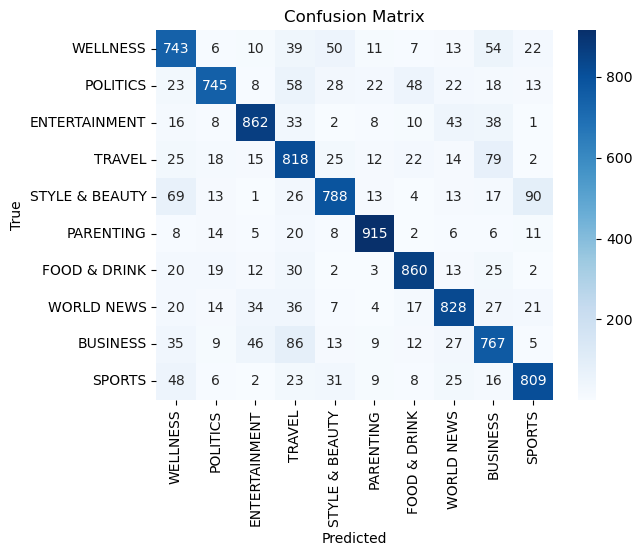

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


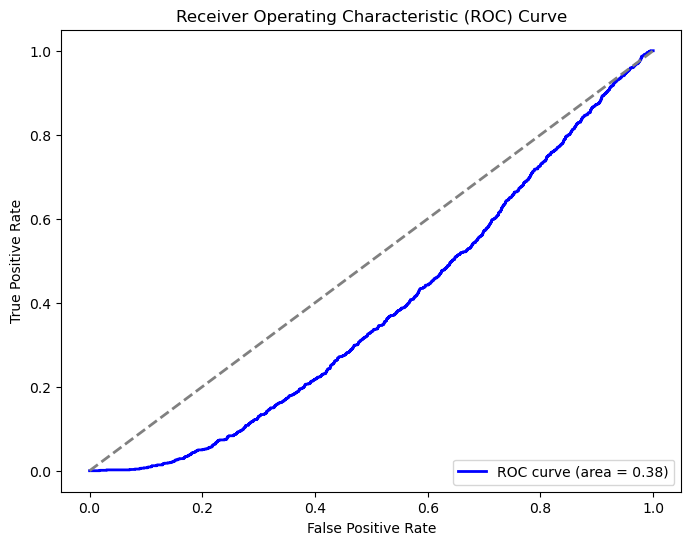

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=y.unique())
fpr, tpr, thresholds = roc_curve(y_test_bin[:, 0], nb.predict_proba(X_test_tfidf)[:, 1]
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()  # Display ROC curve separately


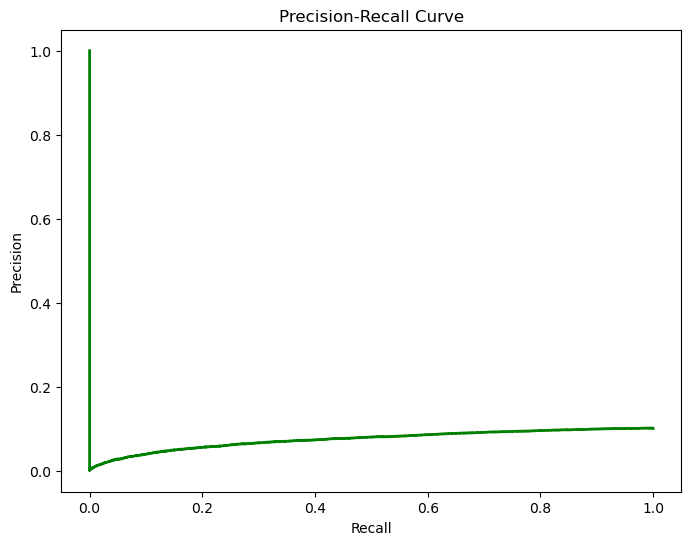

In [63]:
from sklearn.metrics import precision_recall_curve


precision, recall, _ = precision_recall_curve(y_test_bin[:, 0], nb.predict_proba(X_test_tfidf)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()  # Display Precision-Recall curve separately


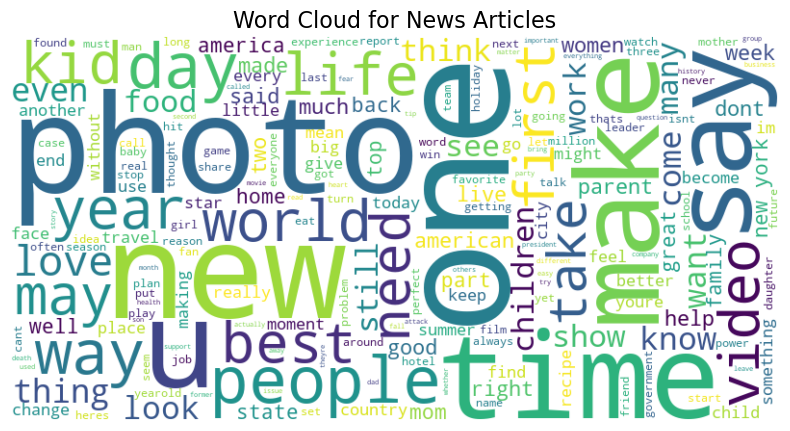

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(dataset['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for better display
plt.title('Word Cloud for News Articles', fontsize=16)
plt.show()


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


unseen_data = [
    "Football match highlights", 
    "Technology advancements in AI", 
    "Political unrest in Europe" 
]
unseen_tfidf = vectorizer.transform(unseen_data)
predictions = model.predict(unseen_tfidf)
print("\nPredictions for Unseen Data:")
for i, article in enumerate(unseen_data):
    print(f"Article: {article} -> Predicted Category: {predictions[i]}")


Accuracy: 81.45%
Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.81      0.78       955
 ENTERTAINMENT       0.81      0.81      0.81       985
  FOOD & DRINK       0.86      0.84      0.85      1021
     PARENTING       0.79      0.76      0.77      1030
      POLITICS       0.81      0.75      0.78      1034
        SPORTS       0.90      0.92      0.91       995
STYLE & BEAUTY       0.87      0.86      0.86       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.73      0.77      0.75      1009
    WORLD NEWS       0.80      0.82      0.81       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000


Predictions for Unseen Data:
Article: Football match highlights -> Predicted Category: SPORTS
Article: Technology advancements in AI -> Predicted Category: WORLD NEWS
Artic

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

X = dataset['links']  
y = dataset['category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


unseen_links = [
    "https://www.sportnews.com/article-football",  
    "https://www.technews.com/ai-breakthrough", 
    "https://www.politicalnews.com/political-tensions"  
]

unseen_tfidf = vectorizer.transform(unseen_links)

# Predict the category of unseen links
predictions = model.predict(unseen_tfidf)

# Show predictions for the unseen links
print("\nPredictions for Unseen Links:")
for i, link in enumerate(unseen_links):
    print(f"Link: {link} -> Predicted Category: {predictions[i]}")


Accuracy: 66.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.67       955
           1       0.79      0.56      0.66       985
           2       0.74      0.64      0.69      1021
           3       0.60      0.57      0.59      1030
           4       0.81      0.58      0.68      1034
           5       0.89      0.82      0.85       995
           6       0.78      0.67      0.72       986
           7       0.68      0.56      0.61      1008
           8       0.39      0.82      0.53      1009
           9       0.83      0.66      0.74       977

    accuracy                           0.66     10000
   macro avg       0.71      0.67      0.67     10000
weighted avg       0.71      0.66      0.67     10000


Predictions for Unseen Links:
Link: https://www.sportnews.com/article-football -> Predicted Category: 5
Link: https://www.technews.com/ai-breakthrough -> Predicted Category: 9
Link: https://www.politi